**ASSIGNMENT 1: DIABETES DATASET**

Lawrence Patrick Fraginal <br>
1004071489 <br>
INF2178 Experimental Design <br>
Prof. Shion Guha

**THE DATA**

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
import dataframe_image as dfi

In [2]:
#read in the data
diabetes = pd.read_csv("C:/Users/FRAGINAL/Downloads/diabetes (2).csv")

In [3]:
#viewing the data
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# data cleaning: I will rename the columns so that they better encapsulate the variables according to tidy data principles
diabetes = diabetes.rename(columns= {'Pregnancies': 'number_of_pregnancies', 'Glucose':'glucose_level', 'BloodPressure':'blood_pressure', 'SkinThickness':'tricep_skin_thickness', 'Insulin':'insulin_level', 'BMI':'body_mass_index', 'DiabetesPedigreeFunction':'diabetes_pedigree_function', 'Age':'age', 'Outcome':'has_diabetes'})
diabetes.head()

number_of_pregnancies  glucose_level  blood_pressure  \
0                      6            148              72   
1                      1             85              66   
2                      8            183              64   
3                      1             89              66   
4                      0            137              40   

   tricep_skin_thickness  insulin_level  body_mass_index  \
0                     35              0             33.6   
1                     29              0             26.6   
2                      0              0             23.3   
3                     23             94             28.1   
4                     35            168             43.1   

   diabetes_pedigree_function  age  has_diabetes  
0                       0.627   50             1  
1                       0.351   31             0  
2                       0.672   32             1  
3                       0.167   21             0  
4                       2.288   33             1

In [7]:
# checking to make sure whether any of the columns were not numerical and had to be converted
# all the data seems to be in order because they are the correct value type and there are not any no nulls either
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_pregnancies       768 non-null    int64  
 1   glucose_level               768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   tricep_skin_thickness       768 non-null    int64  
 4   insulin_level               768 non-null    int64  
 5   body_mass_index             768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   has_diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# to view the number of rows and columns
diabetes.shape

(768, 9)

In [9]:
# exporting dataframe head as an image to use in the report
diabetes_report = diabetes.head(10)
dfi.export(diabetes_report,'diabetes.png')

**DESCRIPTIVE STATISTICS AND VISUALIZATIONS**

In [5]:
#descriptive statistics
diabetes.describe()

number_of_pregnancies  glucose_level  blood_pressure  \
count             768.000000     768.000000      768.000000   
mean                3.845052     120.894531       69.105469   
std                 3.369578      31.972618       19.355807   
min                 0.000000       0.000000        0.000000   
25%                 1.000000      99.000000       62.000000   
50%                 3.000000     117.000000       72.000000   
75%                 6.000000     140.250000       80.000000   
max                17.000000     199.000000      122.000000   

       tricep_skin_thickness  insulin_level  body_mass_index  \
count             768.000000     768.000000       768.000000   
mean               20.536458      79.799479        31.992578   
std                15.952218     115.244002         7.884160   
min                 0.000000       0.000000         0.000000   
25%                 0.000000       0.000000        27.300000   
50%                23.000000      30.500000        32.000000   
75%                32.000000     127.250000        36.600000   
max                99.000000     846.000000        67.100000   

       diabetes_pedigree_function         age  has_diabetes  
count                  768.000000  768.000000    768.000000  
mean                     0.471876   33.240885      0.348958  
std                      0.331329   11.760232      0.476951  
min                      0.078000   21.000000      0.000000  
25%                      0.243750   24.000000      0.000000  
50%                      0.372500   29.000000      0.000000  
75%                      0.626250   41.000000      1.000000  
max                      2.420000   81.000000      1.000000

In [6]:
# exporting the describe dataframe as an image to use in the report 
diabetes_descri = diabetes.describe()
dfi.export(diabetes_descri, 'diabetes descriptive stats.png')

In [10]:
# will split the data into 2 dataframes to gain descriptive statistics on the categorical outcome variable 
not_diabetic= diabetes.loc[diabetes['has_diabetes'] == 0]
not_diabetic

number_of_pregnancies  glucose_level  blood_pressure  \
1                        1             85              66   
3                        1             89              66   
5                        5            116              74   
7                       10            115               0   
10                       4            110              92   
..                     ...            ...             ...   
762                      9             89              62   
763                     10            101              76   
764                      2            122              70   
765                      5            121              72   
767                      1             93              70   

     tricep_skin_thickness  insulin_level  body_mass_index  \
1                       29              0             26.6   
3                       23             94             28.1   
5                        0              0             25.6   
7                        0              0             35.3   
10                       0              0             37.6   
..                     ...            ...              ...   
762                      0              0             22.5   
763                     48            180             32.9   
764                     27              0             36.8   
765                     23            112             26.2   
767                     31              0             30.4   

     diabetes_pedigree_function  age  has_diabetes  
1                         0.351   31             0  
3                         0.167   21             0  
5                         0.201   30             0  
7                         0.134   29             0  
10                        0.191   30             0  
..                          ...  ...           ...  
762                       0.142   33             0  
763                       0.171   63             0  
764                       0.340   27             0  
765                       0.245   30             0  
767                       0.315   23             0  

[500 rows x 9 columns]

In [13]:
diabetic = diabetes.loc[diabetes['has_diabetes'] == 1]
diabetic

number_of_pregnancies  glucose_level  blood_pressure  \
0                        6            148              72   
2                        8            183              64   
4                        0            137              40   
6                        3             78              50   
8                        2            197              70   
..                     ...            ...             ...   
755                      1            128              88   
757                      0            123              72   
759                      6            190              92   
761                      9            170              74   
766                      1            126              60   

     tricep_skin_thickness  insulin_level  body_mass_index  \
0                       35              0             33.6   
2                        0              0             23.3   
4                       35            168             43.1   
6                       32             88             31.0   
8                       45            543             30.5   
..                     ...            ...              ...   
755                     39            110             36.5   
757                      0              0             36.3   
759                      0              0             35.5   
761                     31              0             44.0   
766                      0              0             30.1   

     diabetes_pedigree_function  age  has_diabetes  
0                         0.627   50             1  
2                         0.672   32             1  
4                         2.288   33             1  
6                         0.248   26             1  
8                         0.158   53             1  
..                          ...  ...           ...  
755                       1.057   37             1  
757                       0.258   52             1  
759                       0.278   66             1  
761                       0.403   43             1  
766                       0.349   47             1  

[268 rows x 9 columns]

In [11]:
#checking to see how many participants belong to the diabetic and not-diabetic categories
not_diabetic.count()

number_of_pregnancies         500
glucose_level                 500
blood_pressure                500
tricep_skin_thickness         500
insulin_level                 500
body_mass_index               500
diabetes_pedigree_function    500
age                           500
has_diabetes                  500
dtype: int64

In [14]:
diabetic.count()

number_of_pregnancies         268
glucose_level                 268
blood_pressure                268
tricep_skin_thickness         268
insulin_level                 268
body_mass_index               268
diabetes_pedigree_function    268
age                           268
has_diabetes                  268
dtype: int64

In [12]:
not_diabetic.describe()

number_of_pregnancies  glucose_level  blood_pressure  \
count             500.000000       500.0000      500.000000   
mean                3.298000       109.9800       68.184000   
std                 3.017185        26.1412       18.063075   
min                 0.000000         0.0000        0.000000   
25%                 1.000000        93.0000       62.000000   
50%                 2.000000       107.0000       70.000000   
75%                 5.000000       125.0000       78.000000   
max                13.000000       197.0000      122.000000   

       tricep_skin_thickness  insulin_level  body_mass_index  \
count             500.000000     500.000000       500.000000   
mean               19.664000      68.792000        30.304200   
std                14.889947      98.865289         7.689855   
min                 0.000000       0.000000         0.000000   
25%                 0.000000       0.000000        25.400000   
50%                21.000000      39.000000        30.050000   
75%                31.000000     105.000000        35.300000   
max                60.000000     744.000000        57.300000   

       diabetes_pedigree_function         age  has_diabetes  
count                  500.000000  500.000000         500.0  
mean                     0.429734   31.190000           0.0  
std                      0.299085   11.667655           0.0  
min                      0.078000   21.000000           0.0  
25%                      0.229750   23.000000           0.0  
50%                      0.336000   27.000000           0.0  
75%                      0.561750   37.000000           0.0  
max                      2.329000   81.000000           0.0

In [15]:
diabetic.describe()
# seems that women with diabetes are older, have had more pregnancies, have a higher BMI and thicker tricep skin, 
# have higher blood pressure, more susceptible to the disease based on family history as measured by pedigree function, and have
# higher insulin levels

number_of_pregnancies  glucose_level  blood_pressure  \
count             268.000000     268.000000      268.000000   
mean                4.865672     141.257463       70.824627   
std                 3.741239      31.939622       21.491812   
min                 0.000000       0.000000        0.000000   
25%                 1.750000     119.000000       66.000000   
50%                 4.000000     140.000000       74.000000   
75%                 8.000000     167.000000       82.000000   
max                17.000000     199.000000      114.000000   

       tricep_skin_thickness  insulin_level  body_mass_index  \
count             268.000000     268.000000       268.000000   
mean               22.164179     100.335821        35.142537   
std                17.679711     138.689125         7.262967   
min                 0.000000       0.000000         0.000000   
25%                 0.000000       0.000000        30.800000   
50%                27.000000       0.000000        34.250000   
75%                36.000000     167.250000        38.775000   
max                99.000000     846.000000        67.100000   

       diabetes_pedigree_function         age  has_diabetes  
count                  268.000000  268.000000         268.0  
mean                     0.550500   37.067164           1.0  
std                      0.372354   10.968254           0.0  
min                      0.088000   21.000000           1.0  
25%                      0.262500   28.000000           1.0  
50%                      0.449000   36.000000           1.0  
75%                      0.728000   44.000000           1.0  
max                      2.420000   70.000000           1.0

In [16]:
sns.histplot(data=diabetes, x='age').set_title('Count by Age')
#shows a bias towards younger people

Text(0.5, 1.0, 'Count by Age')

Text(0.5, 1.0, 'Glucose Levels')

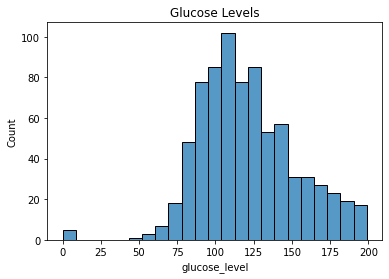

In [17]:
sns.histplot(data=diabetes, x= 'glucose_level').set_title('Glucose Levels')
#shows an approximately normal distribution

In [18]:
gluc = diabetes['glucose_level']
sns.distplot(gluc).set_title('Probability Density of Glucose Levels')

C:\Users\FRAGINAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability Density of Glucose Levels')

Text(0.5, 1.0, 'Age by Diagnosis')

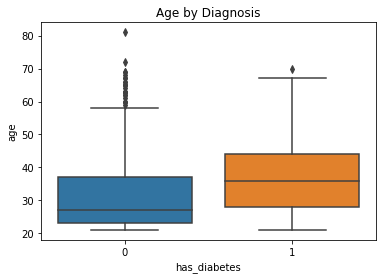

In [19]:
sns.boxplot(data= diabetes, x= 'has_diabetes', y= 'age').set_title('Age by Diagnosis')
# the women with diabetes are older

Text(0.5, 1.0, 'Glucose Levels by Diagnosis')

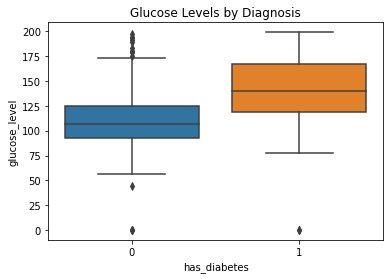

In [20]:
sns.boxplot(data= diabetes, x= 'has_diabetes', y='glucose_level').set_title('Glucose Levels by Diagnosis')
#interpretation: seems like the glucose levels of those with diabetes are much higher than those without 

Text(0.5, 1.0, 'Glucose Levels by Age')

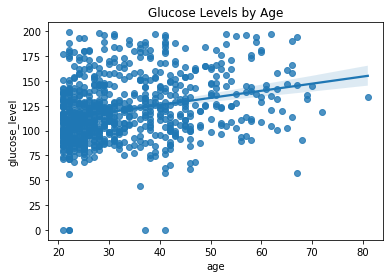

In [21]:
sns.regplot(data= diabetes, x= 'age', y= 'glucose_level').set_title('Glucose Levels by Age')
# age seems to correlate with higher glucose

Text(0.5, 1.0, 'Glucose levels by Insulin level ')

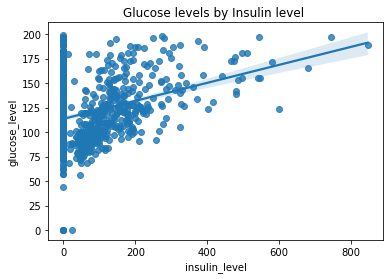

In [22]:
sns.regplot(data= diabetes, x= 'insulin_level', y= 'glucose_level').set_title('Glucose levels by Insulin level ')
# seems to be a correlation between increase in glucose and in insulin

Text(0.5, 1.0, 'Glucose Levels by Diabetes Pedigree Function')

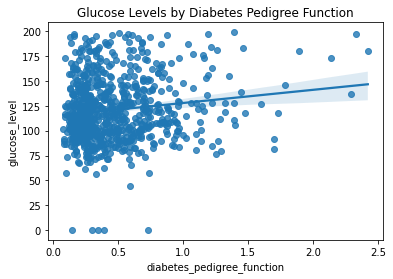

In [23]:
sns.regplot(data= diabetes, x= 'diabetes_pedigree_function', y= 'glucose_level').set_title('Glucose Levels by Diabetes Pedigree Function')
# minor increase in glucose level according to DPF

Text(0.5, 1.0, 'Glucose Levels by Body Mass Index')

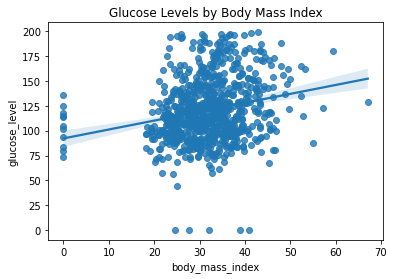

In [24]:
sns.regplot(data= diabetes, x= 'body_mass_index', y= 'glucose_level').set_title('Glucose Levels by Body Mass Index')
# slight increase in glucose level as body mass increases

Text(0.5, 1.0, 'Glucose Levels by Number of Pregnancies')

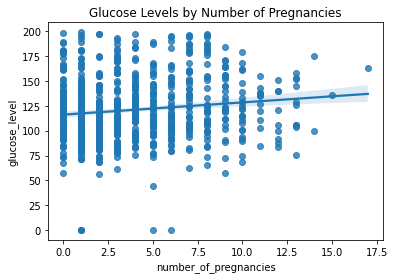

In [25]:
sns.regplot(data = diabetes, x='number_of_pregnancies', y='glucose_level').set_title('Glucose Levels by Number of Pregnancies')
#slight increase

In [26]:
# will conduct a two sample t-test since the observations from the visualization indicate a potentially significant statistical difference in the means of the glucose levels 

# first, I need to divide the dataframe into the independent samples, collect information as a list so that I can run it through SciPy
positive = diabetes.loc[lambda x: (x['has_diabetes'] == 1)]
negative = diabetes.loc[lambda x: (x['has_diabetes'] == 0)]

positive1 = positive['glucose_level'].to_list()
negative1 = negative['glucose_level'].to_list()

In [27]:
# two sample t-test: glucose level
tStat, pValue = stats.ttest_ind(positive1, negative1, equal_var = False)
print('T-Statistic:', tStat)
print('p-Value:', pValue)

#interpretation: significantly small pValue, which means we reject the null hypothesis, which means there is a statisically signficant difference

T-Statistic: 13.751537067396411
p-Value: 2.6441613495403223e-36


**ANALYSES**

ONE WAY ANOVA


Note: can't do a Two way ANOVA because we only have 1 categorical variable.

In [30]:
import pingouin as pg

In [31]:
#One Way ANOVA to determine the difference in the means of glucose levels between those with diabetes, and those without
aov = pg.anova(data=diabetes, dv='glucose_level', between='has_diabetes', detailed = True)
print(aov)

## statistically significant, denoted by the low p Value

         Source             SS   DF             MS           F         p-unc  \
0  has_diabetes  170689.421957    1  170689.421957  213.161752  8.935432e-43   
1        Within  613375.035075  766     800.750699         NaN           NaN   

        np2  
0  0.217698  
1       NaN  


In [32]:
#post hoc test
pt = pg.pairwise_tukey(dv='glucose_level', between='has_diabetes', effsize = 'cohen', data= diabetes)
print(pt)

# 31.28 difference in the means. Those without diabetes have average of 109.98, whereas those with diabetes have an average of 141.26. 
# effect size: negative direction. Shion: not that you have diabetes, so you have glucose. It's that you have glucose, so they have diabetes.
# large effect size

   A  B  mean(A)     mean(B)       diff        se         T  p-tukey     cohen
0  0  1   109.98  141.257463 -31.277463  2.142283 -14.60006      0.0 -1.105307


In [33]:
#will use the statsmodels package to gain more insight about the accuracy of the model
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('glucose_level ~ has_diabetes',
         data=diabetes).fit()

In [34]:
# checking the R squared and adjusted R squared to check the accuracy of the model 
mod.summary()

# based on these results: glucose levels account for about 22% of the variation in the outcome variable. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          glucose_level   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           8.94e-43
Time:                        09:52:18   Log-Likelihood:                -3656.0
No. Observations:                 768   AIC:                             7316.
Df Residuals:                     766   BIC:                             7325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      109.9800      1.266     86.906      0.000     107.496     112.464
has_diabetes    31.2775      2.142     14.600      0.000      27.072      35.483
==============================================================================
Omnibus:                       37.604   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.567
Skew:                          -0.158   Prob(JB):                     1.19e-23
Kurtosis:                       4.789   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MULTIPLE LINEAR REGRESSION

In [35]:
# multiple linear regression model to predict the glucose_level
X = diabetes[['number_of_pregnancies','blood_pressure','tricep_skin_thickness','body_mass_index','diabetes_pedigree_function','age']]
Y = diabetes['glucose_level']

In [36]:
#import test-train split so that 80% of the data trains the data, and 20% tests the accuracy of the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=0)

In [37]:
#building the model using the scikitlearn Linear Regression package
from sklearn.linear_model import LinearRegression

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [39]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df
#Diabetes Pedigree Function is the most useful indicator of diabetes
#everything else has a negligible effect
# for future research with ANCOVA: impact without Diabetes Pedigree Function to reduce bias

Coefficient
number_of_pregnancies         -0.228271
blood_pressure                 0.045275
tricep_skin_thickness         -0.021219
body_mass_index                0.875247
diabetes_pedigree_function     7.502864
age                            0.738664

In [53]:
#exporting the dataframe with coefficients to use in the report 
dfi.export(coeff_df, 'diabetes_coefficients.png')

In [40]:
Y_pred = regressor.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

Actual   Predicted
661     199  129.137824
122     107  114.265887
113      76  115.632523
14      166  128.952636
529     111  114.904362
..      ...         ...
476     105  121.042134
482      85  111.136315
230     142  125.161320
527     116  106.476918
380     107  115.820275

[154 rows x 2 columns]

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# really bad model. The model is about 24 Hgmm off base. This could be the difference between a true and false diagnosis. 
# could be affected by all the outliers

Mean Absolute Error: 24.36379911744596
Mean Squared Error: 987.8799213385423
Root Mean Squared Error: 31.430557127396618


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

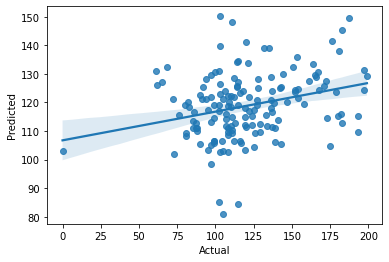

In [43]:
sns.regplot(data=df, x='Actual', y='Predicted')

Simple Linear Regression using DPF

In [44]:
diabetes2 = diabetes[['diabetes_pedigree_function','glucose_level']]

In [45]:
diabetes2

diabetes_pedigree_function  glucose_level
0                         0.627            148
1                         0.351             85
2                         0.672            183
3                         0.167             89
4                         2.288            137
..                          ...            ...
763                       0.171            101
764                       0.340            122
765                       0.245            121
766                       0.349            126
767                       0.315             93

[768 rows x 2 columns]

In [46]:
x = diabetes2.iloc[:,:-1].values
y = diabetes2.iloc[:,1].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
regressor1 = LinearRegression()
regressor1.fit(x_train, y_train)

LinearRegression()

In [49]:
print(regressor1.coef_)

[11.30804201]


In [50]:
y_pred = regressor1.predict(x_test)

In [51]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

Actual   Predicted
0       199  131.384306
1       107  120.189344
2        76  120.042340
3       166  122.258716
4       111  123.084203
..      ...         ...
149     105  123.660913
150      85  119.081156
151     142  122.914582
152     116  116.830856
153     107  124.904798

[154 rows x 2 columns]

In [52]:
#accuracy metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25.033785086983716
Mean Squared Error: 1026.1727481152443
Root Mean Squared Error: 32.03393119982692
